<a href="https://colab.research.google.com/github/benyanko/DeepLearningAndAI/blob/main/CNN_CIFAR_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Image Classification using CNN**
implementing a Deep Learning Model using CIFAR-10 dataset.
It has 60,000 color images comprising of 10 different classes. The image size is 32x32 and the dataset has 50,000 training images and 10,000 test images.
Take an input image and classify images to class.


In [7]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout, MaxPooling2D, BatchNormalization
from tensorflow.keras.models import Model
from sklearn.metrics import confusion_matrix
import itertools

# Load data

In [8]:
cifar10 = tf.keras.datasets.cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data() # data returns two tuple 
x_train, x_test = x_train / 255.0, x_test / 255.0 # Normalize values ​​in the range of 0 to 1 
y_train, y_test = y_train.flatten(), y_test.flatten() # Target are 2D, so we flatten it
print("x_train shape: ", x_train.shape) 
print("y train shape: ", y_train.shape)

x_train shape:  (50000, 32, 32, 3)
y train shape:  (50000,)


In [9]:
# Number of classes

K = len(set(y_train))
print("Number of classes: ", K)

Number of classes:  10


# Build The Model
Build the model using the functional API

In [11]:
# We are using VGG architecture
# conv -> batch -> pool -> dense -> output

# Conv2D layer -
# (Dimensionality of the output space,
# Filter dimensions,
# Activation func = ReLU - f(x)=max(0,x),
# padding - mode(valid, same, full))

# Batch Normalization - Applies a transformation that maintains the mean output close to 0 and the output standard deviation close to 1.

# MaxPooling2D - Downsamples the input representation by taking the maximum value over the window.

#Flatten layer - Convert the image to a feature vector

# Dropout layer - Randomly sets input units to 0 with a frequency of rate at each step during training time, which helps prevent overfitting.

# Dense layer with 512 units (hyperparameter selection) - dimensionality of the output space, activation ReLU - f(x)=max(0,x).

# Dense layer with K units for our K clasess, activation 'Softmax' - output is therefore a probability distribution (maps our output to a [0,1] range).


i = Input(shape=x_train[0].shape)

x = Conv2D(32, (3, 3), activation='relu', padding='same')(i)
x = BatchNormalization()(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)
x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)

x = Flatten()(x)
x = Dropout(0.2)(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(K, activation='softmax')(x)

model = Model(i, x)

# Compile The Model

In [13]:
# Compile defines the loss function, the optimizer and the metrics.
# Adam optimization is a stochastic gradient descent method.
# Cost func is sparse_categorical_crossentropy because we expect labels to be provided as integers
# Metric functions is accuracy which calculates how often predictions equal labels

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

#Train The Model

In [15]:
# Fit with data augmentation

#Batch size - Number of images to include in each batch of training data

#data_generator - Increase the diversity of data available for training models, without actually collecting new data. 
#train generator - Data_generator.flow is what actually return the generated data we need.
#step per epoch - Total number of steps (batches of samples) to yield from generator before declaring one epoch finished and starting the next epoch

# Validation data - x_test, y_test
# epochs=50 - "one pass over the entire dataset", used to separate training into distinct phases

batch_size = 32
data_generator = tf.keras.preprocessing.image.ImageDataGenerator(width_shift_range=0.1, height_shift_range=0.1,
                                                                 horizontal_flip=True)
train_generator = data_generator.flow(x_train, y_train, batch_size)
steps_per_epoch = x_train.shape[0] // batch_size

r = model.fit(train_generator, validation_data=(x_test, y_test), steps_per_epoch=steps_per_epoch, epochs=50)

Epoch 1/50
1562/1562 [==============================] - 37s 19ms/step - loss: 1.8071 - accuracy: 0.4176 - val_loss: 1.0828 - val_accuracy: 0.6331
Epoch 2/50
1562/1562 [==============================] - 29s 19ms/step - loss: 1.0367 - accuracy: 0.6361 - val_loss: 1.4068 - val_accuracy: 0.5467
Epoch 3/50
1562/1562 [==============================] - 29s 18ms/step - loss: 0.8720 - accuracy: 0.6989 - val_loss: 0.7754 - val_accuracy: 0.7406
Epoch 4/50
1562/1562 [==============================] - 29s 18ms/step - loss: 0.7624 - accuracy: 0.7384 - val_loss: 0.7997 - val_accuracy: 0.7304
Epoch 5/50
1562/1562 [==============================] - 28s 18ms/step - loss: 0.6856 - accuracy: 0.7627 - val_loss: 0.6722 - val_accuracy: 0.7745
Epoch 6/50
1562/1562 [==============================] - 29s 18ms/step - loss: 0.6330 - accuracy: 0.7832 - val_loss: 0.6655 - val_accuracy: 0.7811
Epoch 7/50
1562/1562 [==============================] - 29s 18ms/step - loss: 0.5953 - accuracy: 0.7985 - val_loss: 0.6032 -

# Plots

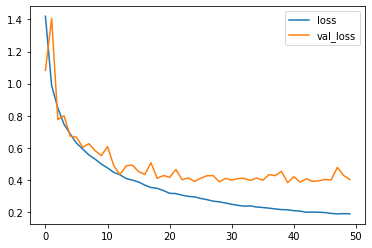

In [16]:
# Plot loss per iteration

plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

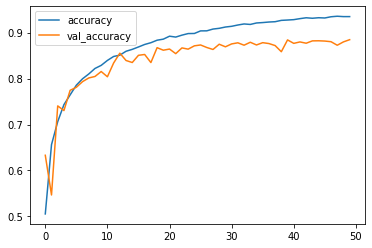

In [17]:
#plot accuracy per iteration

plt.plot(r.history['accuracy'], label='accuracy')
plt.plot(r.history['val_accuracy'], label='val_accuracy')
plt.legend()

Confusion Matrix, without Normalization
[[916   7  17  11   2   0   4   4  26  13]
 [  1 973   1   0   1   0   1   0   6  17]
 [ 31   0 833  40  19  14  45   9   5   4]
 [  8   3  29 816  22  53  37  17   7   8]
 [  7   1  33  41 850  10  32  20   2   4]
 [  7   1  16 173  16 748  13  19   3   4]
 [  5   0  16  27   5   3 942   0   1   1]
 [ 10   3  10  25  15  12   1 921   1   2]
 [ 35  17   3   3   0   0   1   2 927  12]
 [ 14  50   2   4   0   0   2   1   6 921]]


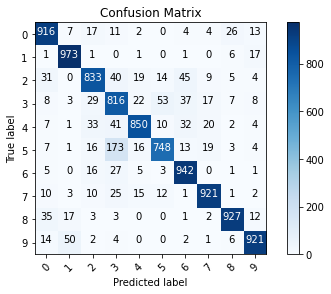

In [18]:
# Plot confusion matrix

# This function prints and plots the confusion matrix.
# Normalization can be applied by setting 'normalize=True'.

def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion Matrix', cmap=plt.cm.Blues):
  if normalize:
    cm = cm.astype('float') / cm.sum(axis=1) [:, np.newaxis]
    print ("Normalizrd Confusion Matrix")
  else:
        print ("Confusion Matrix, without Normalization")

  print(cm)

  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], fmt), horizontalalignment='center', color='white' if cm[i, j] > thresh else 'black')

  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()

p_test = model.predict(x_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, list(range(10)))



In [5]:
#Label Mapping

labels = '''Airplane
Automobile
Bird
Cat
Deer
Dog
Frog
Horse
Ship
TRUCK'''.split()

It can be seen that the results make sense.
The pairs that are easy to confuse are indeed images whose visibility is very similar.
For example:
```
Dog <--> Cat
Horse <--> Deer
```





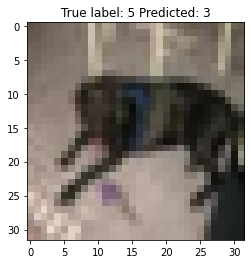

In [30]:
# Show some misclassified examples

misclassified_index = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_index)
plt.imshow(x_test[i], cmap='gray')
plt.title("True label: %s Predicted: %s" % (y_test[i], p_test[i]));

In [33]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization_2 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
batch_normalization_3 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 16, 16, 64)        18496 